# get sensor data

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import pandas as pd

sensor = pd.read_csv('https://raw.githubusercontent.com/shadgriffin/machine_failure/master/equipment_failure_data_1.csv')
sensor.head()


#,"DoleLR"	,"PID",	"outpressure",	"inpressure",	"temp"]]

ys_failure=sensor['EQUIPMENT_FAILURE']==1
ys_no_failure=sensor['EQUIPMENT_FAILURE']==0
sensor_failure=sensor[ys_failure].truncate(after=3000)
sensor_no_failure=sensor[ys_no_failure].truncate(after=3)

#sensor_no_failure.head(30)


Xs=sensor[["S15",	"S17"	,"S13","S15","S16"]].truncate(after=10000)	
ys=sensor['EQUIPMENT_FAILURE'].truncate(after=10000)
sensor.head()

sensor_sorted=sensor.sort_values(by='DATE', ascending=True)
Xdate=sensor_sorted["DATE"]#.truncate(after=10000)	
yvalue=sensor_sorted["S5"]#.truncate(after=10000)	

Xdate

83364     1/1/15
144768    1/1/15
30732     1/1/15
37311     1/1/15
51931     1/1/15
           ...  
40852     9/9/16
128572    9/9/16
49624     9/9/16
91291     9/9/16
83250     9/9/16
Name: DATE, Length: 149855, dtype: object

# use pickel save/load model

In [2]:
import pickle

from sklearn import svm
from sklearn.model_selection import train_test_split
#Create a svm Classifier
#kernel ooption _ linear, rbf, Polynomial 
clf = svm.SVC(C=1.0, kernel='linear') # Linear Kernel



X_train, X_test, y_train, y_test = train_test_split(Xs, ys, random_state=0)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_hat = clf.predict(X_test)
score=clf.score(X_test, y_hat)
score




1.0

In [12]:
#save model
pickle.dump(clf, open('model_clf.pkl','wb'))

model = pickle.load(open('model_clf.pkl','rb'))


# isolation forest

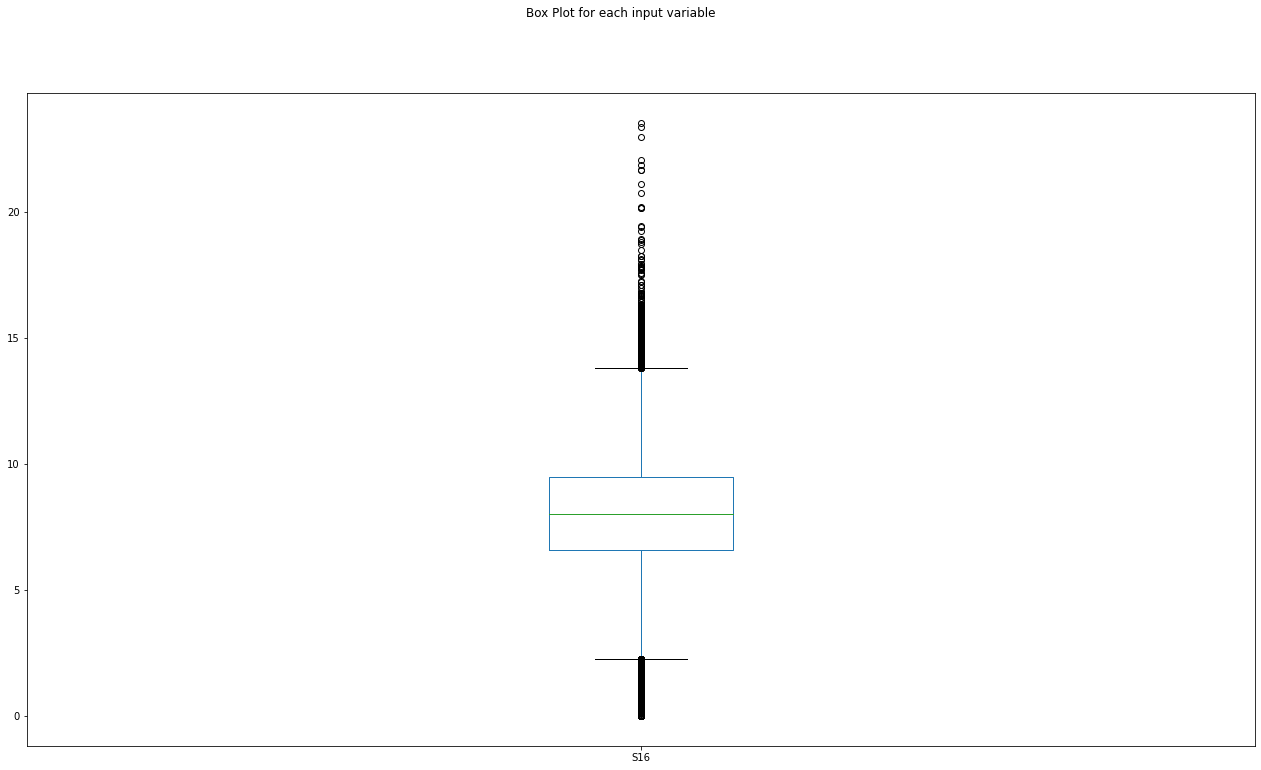

In [14]:
#box plot for each input feature
sensor['S16'].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(22,12), 
                                        title='Box Plot for each input variable')
plt.savefig('fruits_boxplot')
plt.show()

In [91]:
from sklearn.ensemble import IsolationForest
#to_model_column='value'
clf=IsolationForest(n_estimators=10, max_samples='auto', contamination=float(.04), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, verbose=0)
clf.fit(sensor_sorted['S5'].values.reshape(-1,1))

sensor_sorted['scores']=clf.decision_function(sensor_sorted[['S5']])
sensor_sorted['anomaly']=clf.predict(sensor_sorted[['S5']])
sensor_sorted.head()

sensor_sorted.loc[sensor_sorted['anomaly'] == 1,'anomaly'] = 0
sensor_sorted.loc[sensor_sorted['anomaly'] == -1,'anomaly'] = 1

sensor_sorted['anomaly_failure']=sensor_sorted.loc[sensor_sorted['anomaly'] == -1,'anomaly'] = 1
#print anomalies as numbers
sensor_sorted['anomaly'].value_counts()

0    143912
1      5943
Name: anomaly, dtype: int64

In [87]:
sen=sensor_sorted[sensor_sorted['anomaly'] == 1]
sen.head()

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT,scores,anomaly,timestamp,anomaly_failure
111142,100469,1/1/15,C,O,U,2,0.00,0.0,0.00,0.0,6.7620,5.50,19.3,0,0.0,350,-0.011742,1,1/1/15,1
125031,100526,1/1/15,C,M,Y,1,0.00,0.0,0.00,0.0,6.8540,0.40,0.0,0,0.0,3370,-0.011742,1,1/1/15,1
147692,100610,1/1/15,E,P,Z,4,24.48,0.0,36.28,11066.0,5.2808,0.89,284.6,0,0.0,470,-0.014038,1,1/1/15,1
28539,100121,1/1/15,A,P,Q,4,0.00,0.0,0.00,0.0,8.6931,3.80,87.7,0,0.0,610,-0.011742,1,1/1/15,1
98715,100431,1/1/15,A,P,X,4,0.00,0.0,0.00,0.0,9.1812,2.43,614.8,0,0.0,350,-0.011742,1,1/1/15,1


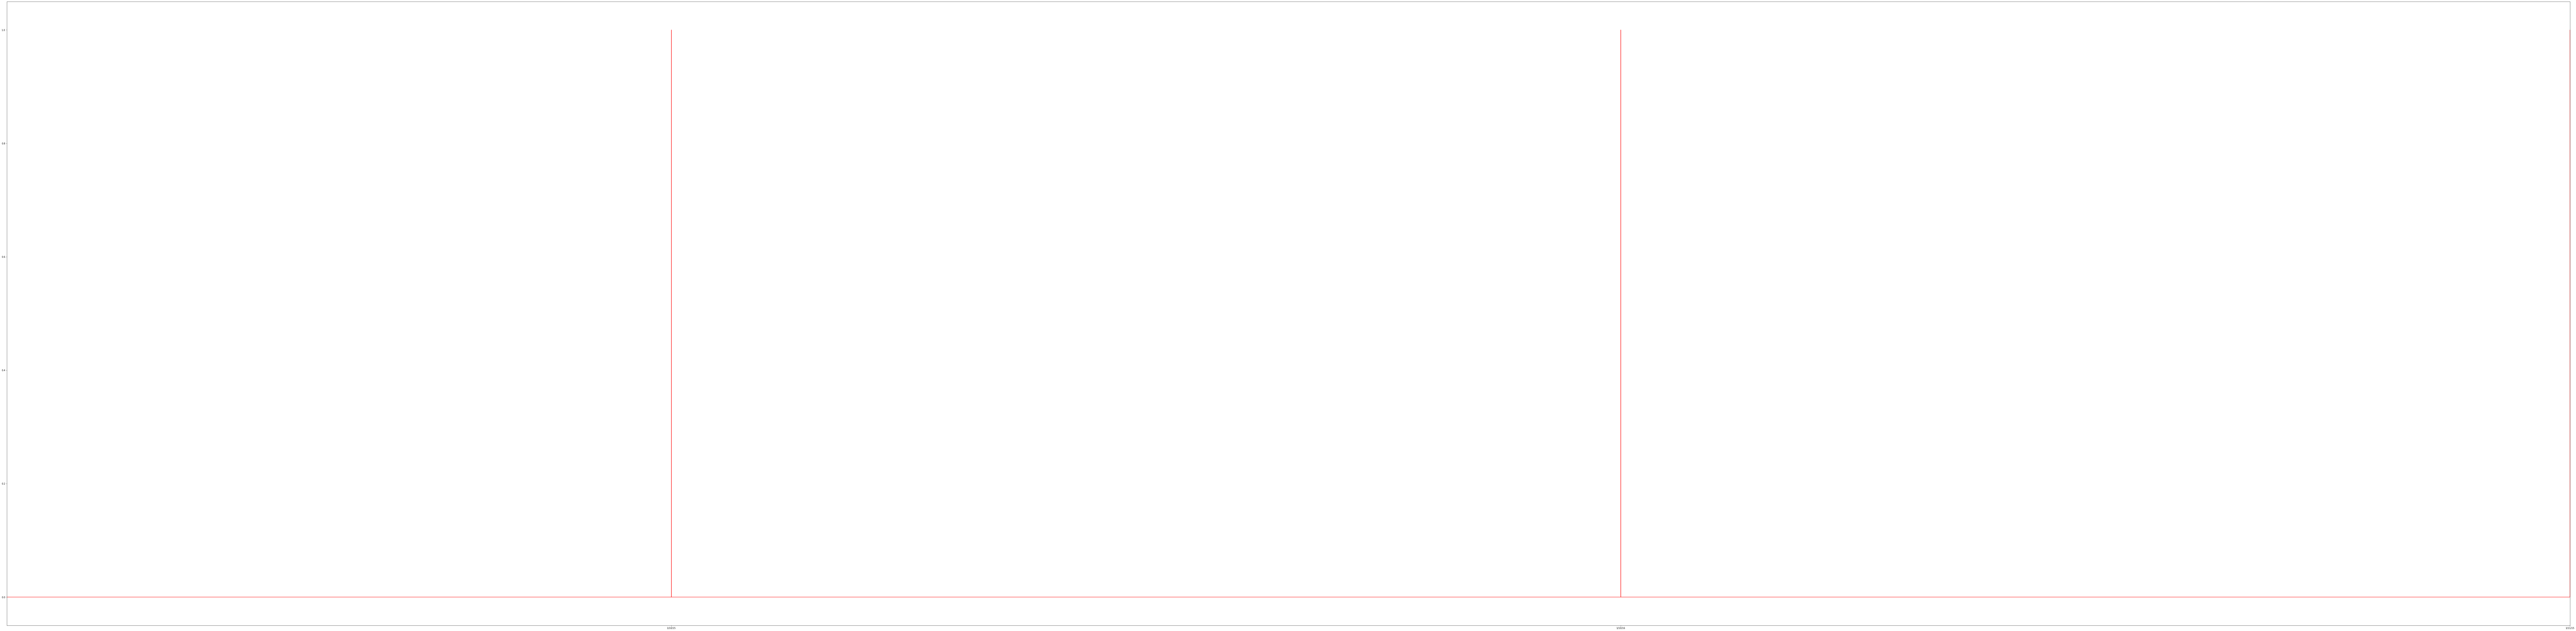

In [94]:
# Using graph_objects
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#import plotly.plotly as py

import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.graph_objs as go


plt.figure(figsize=(200,50))

#plt.plot(Xdate, yvalue)
plt.plot(Xdate, sensor_sorted['anomaly'], color="r")
plt.xlim(1.3, 4.0)
plt.show()
#iplot(fig)

In [95]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_gtkagg import FigureCanvasGTKAgg as FigureCanvas
from matplotlib.backends.backend_gtkagg import NavigationToolbar2GTKAgg as NavigationToolbar

win = gtk.Window()
win.connect("destroy", lambda x: gtk.main_quit())
win.set_default_size(400,300)
win.set_title("Embedding in GTK")

vbox = gtk.VBox()
win.add(vbox)

fig = Figure(figsize=(5,4), dpi=100)
ax = fig.add_subplot(111)
ax.plot([1,2,3])

canvas = FigureCanvas(fig)  # a gtk.DrawingArea
vbox.pack_start(canvas)
toolbar = NavigationToolbar(canvas, win)
vbox.pack_start(toolbar, False, False)

win.show_all()
gtk.main()

ModuleNotFoundError: No module named 'matplotlib.backends.backend_gtkagg'

In [ ]:
plt.figure(figsize=(60,10))

plt.plot(Xdate, yvalue)
plt.show()
#iplot(fig)

In [73]:
df=sensor_sorted

df['anomaly']=sensor_sorted['S5']

df['timestamp']=sensor_sorted['DATE']

def plot_anomaly(df,metric_name):
   # df.timestamp = pd.to_datetime(df['timestamp'].astype(str), format="%Y-%m-%d %H:%M:%S")
    dates = df.timestamp
    #identify the anomaly points and create a array of its values for plot
    bool_array = (abs(sensor_sorted['anomaly']) > 0)
    actuals = sensor_sorted['S5'][-len(bool_array):]
    anomaly_points = bool_array * actuals
    anomaly_points[anomaly_points == 0] = np.nan
    #A dictionary for conditional format table based on anomaly
    color_map = {0: "blue", 1: "red"}
#Table which includes Date,Actuals,Change occured from previous point
    table = go.Table(
    domain=dict(x=[0, 1],
                y=[0, 0.3]),
    columnwidth=[1, 2],
    # columnorder=[0, 1, 2,],
    header=dict(height=20,
                values=[['<b>Date</b>'], ['<b>Actual Values </b>'],
                        ],
                font=dict(color=['rgb(45, 45, 45)'] * 5, size=14),
                fill=dict(color='#d562be')),
    cells=dict(values=[sensor_sorted.round(3)[k].tolist() for k in ['DATE', 'S5']],
               line=dict(color='#506784'),
               align=['center'] * 5,
               font=dict(color=['rgb(40, 40, 40)'] * 5, size=12),
               # format = [None] + [",.4f"] + [',.4f'],
               # suffix=[None] * 4,
               suffix=[None] + [''] + [''] + ['%'] + [''],
               height=27,
               fill=dict(color=[sensor_sorted['anomaly'].map(color_map)],#map based on anomaly level from dictionary
               )
               ))
    #Plot the actuals points
    Actuals = go.Scatter(name='Actuals',
                     x=sensor_sorted['DATE'],
                     y=sensor_sorted['S5'],
                     xaxis='x1', yaxis='y1',
                     mode='line',
                     marker=dict(size=12,
                                 line=dict(width=1),
                                 color="blue"))
    #Highlight the anomaly points
    anomalies_map = go.Scatter(name="Anomaly",
                               showlegend=True,
                               x=sensor_sorted['DATE'],
                               y=anomaly_points,
                               mode='markers',
                               xaxis='x1',
                               yaxis='y1',
                               marker=dict(color="red",
                                           size=11,
                                           line=dict(
                                               color="red",
                                               width=2)))
    axis = dict(
        showline=True,
        zeroline=False,
        showgrid=True,
        mirror=True,
        ticklen=4,
        gridcolor='#ffffff',
        tickfont=dict(size=10))
    layout = dict(
        width=1000,
        height=865,
        autosize=False,
        title=metric_name,
        margin=dict(t=75),
        showlegend=True,
        xaxis1=dict(axis, **dict(domain=[0, 1], anchor='y1', showticklabels=True)),
        yaxis1=dict(axis, **dict(domain=[2 * 0.21 + 0.20, 1], anchor='x1', hoverformat='.2f')))
    fig = go.Figure(data=[table, anomalies_map, Actuals], layout=layout)
    iplot(fig)
    pyplot.show()
plot_anomaly(sensor_sorted,'anomalies')

TypeError: 'str' object is not callable

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import eia
def retrieve_time_series(api, series_ID):
    """
    Return the time series dataframe, based on API and unique Series ID
    Arguments:
        api: API that we're connected to
        series_ID: string. Name of the series that we want to pull from the EIA API
    Outputs:
        df: Pandas dataframe of time series
    """
    #Retrieve Data By Series ID 
    series_search = api.data_by_series(series=series_ID)
    ##Create a pandas dataframe from the retrieved time series
    df = pd.DataFrame(series_search)
    return df
def scatterplot(x_data, y_data, x_label, y_label, title):
    """
    Arguments:
        x_data: Series. Desired x-axis for scatterplot.
        y_data: Series. Desired y-axis for scatterplot.
        x_label: String. Label for x-axis.
        y_label: String. Label for y-axis.
        title: String. Title of plot
    Outputs:
        Scatterplot in console.
    """
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data, s = 30, color = '#539caf', alpha = 0.75)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    fig.autofmt_xdate()
    
#####EXECUTE IN MAIN BLOCK
#Create EIA API using your specific API key
api_key = 'YOUR API KEY HERE'
api = eia.API(api_key)
    
#Pull the oil WTI price data
series_ID='PET.EER_EPMRU_PF4_RGC_DPG.D'
sensor_sorted=retrieve_time_series(api, series_ID)
sensor_sorted.reset_index(level=0, inplace=True)
#Rename the columns for easer analysis
sensor_sorted.rename(columns={'index':'Date',
            sensor_sorted.columns[1]:'Gasoline_Price'}, 
            inplace=True)
     
#Visualize anomalies using matplotlib function



scatterplot(sensor_sorted['DATE'],
                sensor_sorted['S5'], 
                'Date', 
                'Gasoline Price (Dollars Per Gallon)', 
                'US Gulf Coast Gasoline Price Time Series: 2014-Present')

KeyError: 'series'

In [29]:
# evaluate model performance with outliers removed using isolation forest
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
# load the dataset
#url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
#df = read_csv(url, header=None)
# retrieve the array
#data = df.values
# split into input and output elements
#X, y = data[:, :-1], data[:, -1]
X=Xs
y=ys
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
# select all rows that are not outliers
#mask = yhat != -1
#X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(6700, 5) (6700,)
(6700, 5) (6700,)
MAE: 0.005


In [22]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [30]:
yhat
iso

IsolationForest(contamination=0.1)

In [75]:
pip install EIA-python

Note: you may need to restart the kernel to use updated packages.
